In [1]:
from similarityfunctions import *
from hypfunctions import *
import networkx as nx
from itertools import permutations, combinations
import pandas as pd
import matplotlib. pyplot as plt 

13


C:\Users\hanaa\Anaconda3\lib\site-packages\networkx\drawing\layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


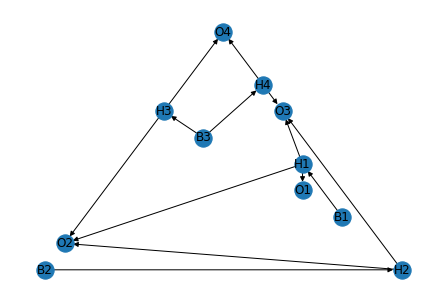

In [2]:
# make the graph
dg = nx.DiGraph()
dg.add_nodes_from(['B1', 'B2', 'B3', 'H1', 'H2', 'H3', 'H4', 'O1', 'O2', 'O3', 'O4'])
dg.add_weighted_edges_from([('B1', 'H1', .00131998), ('B2', 'H2', .253215), ('B3', 'H3', .164102),
                            ('B3', 'H4', .00192481), ('H1', 'O1', .0998799), ('H1', 'O2', .132026),
                           ('H1', 'O3', .149337), ('H2', 'O2', .0873762), ('H2', 'O3', .118668),
                           ('H3', 'O2', .123934), ('H3', 'O4', .0342232), ('H4', 'O3', .0717882),
                           ('H4', 'O4', .04508)])

print(len(dg.edges()))
nx.draw_planar(dg, with_labels = True)

In [3]:
bnodes = [node for node in list(dg.nodes()) if not list(dg.predecessors(node)) and list(dg.successors(node))] #root nodes
observations = [node for node in list(dg.nodes()) if not list(dg.successors(node)) and list(dg.predecessors(node))] #terminal nodes
hypotheses = findHypotheses(dg, observations, bnodes)

print(bnodes) 
print(observations) 
print(hypotheses)

['B1', 'B2', 'B3']
['O1', 'O2', 'O3', 'O4']
[['H1', 'H4'], ['H1', 'H2', 'H4'], ['H1', 'H2', 'H3', 'H4'], ['H1']]


In [4]:
# learn the CPTable


########## BACKGROUND
# B1
cpt_B1 = CPT(0)
cpt_B1.add_entry_self((1-.0260472, .0260472))
dg.nodes['B1']['CPT'] = cpt_B1

# B2
cpt_B2 = CPT(0)
cpt_B2.add_entry_self((1-.615996, .615996))
dg.nodes['B2']['CPT'] = cpt_B2

# B3
cpt_B3 = CPT(0)
cpt_B3.add_entry_self((1-.318892, .318892))
dg.nodes['B3']['CPT'] = cpt_B3


########### HYPOTHESES
# H1
cpt_H1 = CPT(1)
cpt_H1.add_entry([1], (1-.371292, .371292))
cpt_H1.add_entry([0], (1-.532645, .532645))
dg.nodes['H1']['CPT'] = cpt_H1

# H2
cpt_H2 = CPT(1)
cpt_H2.add_entry([1], (1-.50549, .50549))
cpt_H2.add_entry([0], (1-.694085, .694085))
dg.nodes['H2']['CPT'] = cpt_H2

# H3
cpt_H3 = CPT(1)
cpt_H3.add_entry([1], (1-.646029, .646029))
cpt_H3.add_entry([0], (1-.164357, .164357))
dg.nodes['H3']['CPT'] = cpt_H3

# H4
cpt_H4 = CPT(1)
cpt_H4.add_entry([1], (1-.371292, .371292))
cpt_H4.add_entry([0], (1-.425611, .425611))
dg.nodes['H4']['CPT'] = cpt_H4


############# OBSERVED EFFECTS
cpt_O1 = CPT(1)
cpt_O1.add_entry([1], (1-.845371, .845371))
cpt_O1.add_entry([0], (1-.503606, .503606))
dg.nodes['O1']['CPT'] = cpt_O1

cpt_O2 = CPT(3)
cpt_O2.add_entry([1, 1, 1], (1-.485969, .485969))
cpt_O2.add_entry([1, 1, 0], (1-.702458, .702458))
cpt_O2.add_entry([1, 0, 1], (1-.521399, .521399))
cpt_O2.add_entry([1, 0, 0], (1-.30641, .30641))
cpt_O2.add_entry([0, 1, 1], (1-.876099, .876099))
cpt_O2.add_entry([0, 1, 0], (1-.131251, .131251))
cpt_O2.add_entry([0, 0, 1], (1-.292697, .292697))
cpt_O2.add_entry([0, 0, 0], (1-.255582, .255582))
dg.nodes['O2']['CPT'] = cpt_O2


cpt_O3 = CPT(3)
cpt_O3.add_entry([1, 1, 1], (1-.443595, .443595))
cpt_O3.add_entry([1, 1, 0], (1-.0692005, .0692005))
cpt_O3.add_entry([1, 0, 1], (1-.760635, .760635))
cpt_O3.add_entry([1, 0, 0], (1-.562661, .562661))
cpt_O3.add_entry([0, 1, 1], (1-.398679, .398679))
cpt_O3.add_entry([0, 1, 0], (1-.714025, .714025))
cpt_O3.add_entry([0, 0, 1], (1-.403932, .403932))
cpt_O3.add_entry([0, 0, 0], (1-.315988, .315988))
dg.nodes['O3']['CPT'] = cpt_O3


cpt_O4 = CPT(2)
cpt_O4.add_entry([1, 1], (1-.76531, .76531))
cpt_O4.add_entry([1, 0], (1-.879789, .879789))
cpt_O4.add_entry([0, 1], (1-.894966, .894966))
cpt_O4.add_entry([0, 0], (1-.656085, .656085))
dg.nodes['O4']['CPT'] = cpt_O4

# Edge Generation
Generate edges from the partial explanation hypothesis node to all missing observations

In [5]:
# get partial explanations
single_hyp = [h for h in hypotheses if not isinstance(h, list)]

# for each partial explanation, identify observations that are not descendants, add edges to those observations
new_edges = []
for s in single_hyp:
    descendants = list(nx.descendants(dg, s))
    missing_obs = list(set(observations) - set(descendants))
    for o in missing_obs:
        dg.add_edge(s, o)
        new_edges.append((s, o))
new_edges

[]

In [6]:
# add edge weight
dg.add_weighted_edges_from([('H1', 'O4', .125332)])

# learn updated CPT table
cpt_O4 = CPT(3)
cpt_O4.add_entry([1, 1, 1], (1-.142328, .142328))
cpt_O4.add_entry([1, 1, 0], (1-.248076, .248076))
cpt_O4.add_entry([1, 0, 1], (1-.492232, .492232))
cpt_O4.add_entry([1, 0, 0], (1-.880375, .880375))
cpt_O4.add_entry([0, 1, 1], (1-.627151, .627151))
cpt_O4.add_entry([0, 1, 0], (1-.127184, .127184))
cpt_O4.add_entry([0, 0, 1], (1-.155563, .155563))
cpt_O4.add_entry([0, 0, 0], (1-.501294, .501294))
dg.nodes['O4']['CPT'] = cpt_O4

In [7]:
hypotheses = findHypotheses(dg, observations, bnodes)
print(hypotheses)

[['H1'], ['H1', 'H3'], ['H1', 'H2', 'H3'], ['H1', 'H3', 'H4'], ['H1']]


# Hypothesis Selection

1. For each hypotheses, calculate marg prob (not flipped)
2. find top n percent
3. For each hypothesis in top n percent, calculate marg prob (flipped)

In [8]:
true_nodes = ['O1', 'O2', 'O3', 'B1', 'B2']
false_nodes = ['B3', 'O4']
observeData(dg, true_nodes, false_nodes)

In [9]:
# find hypotheses with probabilities in top n percent
def select_hypotheses(dg, observations, bnodes, n):
    hypotheses = findHypotheses(dg, observations, bnodes)
    percent = 1 - n/100
    #scenarios = get_possible_truths(dg, bnodes, observations)
    
    prob_dict = {}
    for h in hypotheses: 
        if isinstance(h, list): 
            for x in h:
                dg.nodes[x]['value'] = 1
            prob = calculateTotalMarginalProbability(dg, list(h), observations, bnodes)
            for x in h:
                dg.nodes[x]['value'] = None
        else:
            dg.nodes[h]['value'] = 1
            prob = calculateTotalMarginalProbability(g, list(h), observations, bnodes)
            dg.nodes[h]['value'] = None
        #prob_dict[tuple(h)] = calculateTotalMarginalProbability(dg, list(h), observations, bnodes)
        prob_dict[tuple(h)] = prob
        
    max_prob = max(list(prob_dict.values()))
    min_prob = max_prob*percent
    selected_hyps = [h for h in list(prob_dict.keys()) if (prob_dict.get(h) >= min_prob)]
    select_dict = {}
    for s in selected_hyps: 
        select_dict[tuple(s)] = prob_dict.get(s)
    return select_dict

In [10]:
select_hypotheses(dg, observations, bnodes, 10)

{('H1',): 0.513673735899309}

All data

In [11]:
all_data = {}

In [12]:
scenarios = get_possible_truths(dg, bnodes, observations)
selections = []
probs = []
flipped_probs = []
for s in list(scenarios.keys()):
    false_nodes = scenarios.get(s)
    observeData(dg, list(s), false_nodes)
    
    best_hyps = select_hypotheses(dg, observations, bnodes, 25)
    selections += list(best_hyps.keys())
    probs += list(best_hyps.values())
    
    # calculate P(H|O)
    for h in list(best_hyps.keys()):
        h = list(h)
        if isinstance(h, list): 
            for x in h:
                dg.nodes[x]['value'] = 1
            flipped = calculateTotalMarginalProbabilityObs(dg, list(h), observations, bnodes)
            for x in h:
                dg.nodes[x]['value'] = None
        else: 
            dg.nodes[h]['value'] = 1
            flipped = calculateTotalMarginalProbabilityObs(dg, list(h), observations, bnodes)
            dg.nodes[h]['value'] = None
            
        flipped_probs.append(flipped)

In [14]:
# for all possible truth value combinations, columns: True nodes, False nodes (or not), FBE1, probability1, FBE2, probability2
graph_data = {}
#graph_data['True Nodes'] = list(scenarios.keys())
graph_data['Selected Hypothesis'] = selections
graph_data['P(O|H)'] = probs
graph_data['P(H|O)'] = flipped_probs




df2 = pd.DataFrame(graph_data, columns=list(graph_data.keys()))
df2

,Selected Hypothesis,P(O|H),P(H|O)
0,"(H1,)",0.061748,0.013672
1,"(H1,)",0.100896,0.012862
2,"(H1,)",0.282675,0.029020
3,"(H1, H3)",0.254591,0.040457
4,"(H1, H2, H3)",0.214277,0.049059
...,...,...,...
158,"(H1,)",0.156447,0.010192
159,"(H1,)",0.714775,0.085379
160,"(H1,)",0.419132,0.047504
161,"(H1,)",0.658555,0.055718


# Data visualizations

Graphs: 
1. Count for different hypotheses
2. selected hyps vs P(O|H)
3. selected hyps vs P(H|O)

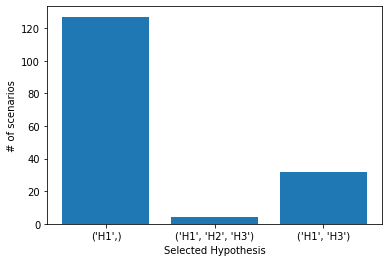

In [15]:
plt.close()
# bar charts of number of times a hypothesis is selected
unique_hyps = [list(x) for x in set(tuple(x) for x in selections)]
count_dict = {}
for h in unique_hyps:
    count = selections.count(tuple(h))
    count_dict[tuple(h)] = count

plt.bar(range(len(count_dict)), count_dict.values(), align='center')
plt.xticks(range(len(count_dict)), list(count_dict.keys()))
plt.ylabel('# of scenarios')
plt.xlabel('Selected Hypothesis')
plt.show()
plt.close()

([<matplotlib.axis.XTick at 0x18ce18f8a48>,
 <a list of 3 Text xticklabel objects>)

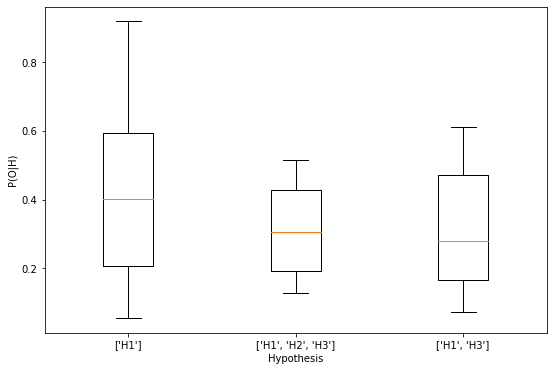

In [26]:
# boxplot for hypothesis vs P(O|H)
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
list_of_prob1 = []
for h in unique_hyps:
    h = tuple(h)
    
    # get indices for h
    i_list = []
    count = 0
    for s in selections:
        if (s == h):
            i_list.append(count)
        count +=1
    prob1 = [probs[i] for i in i_list]
    #prob2 = [flipped_probs[i] for i in probs]
    list_of_prob1.append(prob1)
    
ax = fig.add_subplot(111)
ax.boxplot(list_of_prob1)

ax.set_xlabel('Hypothesis')
ax.set_ylabel('P(O|H)')
plt.xticks([x for x in range(1, len(unique_hyps) + 1)], unique_hyps)

([<matplotlib.axis.XTick at 0x18ce18f3108>,
 <a list of 3 Text xticklabel objects>)

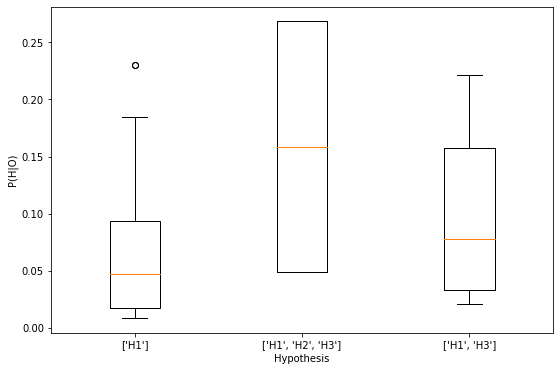

In [30]:
# boxplot for hypothesis vs P(O|H)
plt.close()
fig2 = plt.figure(1, figsize=(9, 6))
list_of_prob2 = []
for h in unique_hyps:
    h = tuple(h)
    
    # get indices for h
    i_list = []
    count = 0
    for s in selections:
        if (s == h):
            i_list.append(count)
        count +=1
        
    prob2 = [flipped_probs[i] for i in i_list]
    list_of_prob2.append(prob2)
    
ax2 = fig2.add_subplot(111)
ax2.boxplot(list_of_prob2)

ax2.set_xlabel('Hypothesis')
ax2.set_ylabel('P(H|O)')
plt.xticks([x for x in range(1, len(unique_hyps) + 1)], unique_hyps)

# Unused

In [ ]:
def hyp_plot(data_dict, hypothesis):
    selected_hyps = data_dict['Selected Hypothesis']
    probs = data_dict['P(O|H)']
    probs_flipped = data_dict['P(H|O)']
    
    i_list = []
    count = 0
    for s in selected_hyps:
        if (s == hypothesis):
            i_list.append(count)
        count +=1
    
    probs_list_flipped = [probs_flipped[i] for i in i_list]
    if (len(hypothesis) == 1): probs_list = [1]*len(probs_list_flipped)
    else: probs_list = [probs[i] for i in i_list]
    
    
    return {tuple(hypothesis): tuple(probs_list)}, {tuple(hypothesis) : tuple(probs_list_flipped)} 

In [ ]:
fig = plt.figure(1, figsize=(9, 6))

plot_probs = []
plot_flipped = []
unique_hyps = [list(x) for x in set(tuple(x) for x in graph_data.get('Selected Hypothesis'))]
for h in unique_hyps:
    probs_dict = hyp_plot(graph_data, tuple(h))
    probs = list(probs_dict[0].values())
    flip_probs = list(probs_dict[1].values())
    
    # best expl. 1 probs
    plot_probs += probs
    ax1 = fig.add_subplot(111)
    ax1.boxplot(plot_probs)

ax1.set_xlabel('Hypothesis')
ax1.set_ylabel('P(O|H)')
plt.xticks([x for x in range(1, len(unique_hyps) + 1)], unique_hyps)

In [ ]:
plt.close()

fig = plt.figure(1, figsize=(9, 6))

plot_probs = []
plot_flipped = []
unique_hyps = [list(x) for x in set(tuple(x) for x in original_data.get('Hypothesis'))]
for h in unique_hyps:
    probs_dict = hyp_plot(original_data, h)
    probs = list(probs_dict[0].values())
    flip_probs = list(probs_dict[1].values())
    
    # best expl. 2 probs
    plot_flipped += flip_probs
    ax2 = fig.add_subplot(111)
    ax2.boxplot(plot_flipped)

ax2.set_xlabel('Hypothesis')
ax2.set_ylabel('P(H|O)')
plt.xticks([x for x in range(1, len(unique_hyps) + 1)], unique_hyps)

In [ ]:
# bar charts of number of times a hypothesis shows up
count_dict = {}
for h in unique_hyps:
    count = original_data.get('Hypothesis').count(h)
    count_dict[tuple(h)] = count

plt.bar(range(len(count_dict)), count_dict.values(), align='center')
plt.xticks(range(len(count_dict)), list(count_dict.keys()))
plt.ylabel('# of scenarios')
plt.xlabel('Hypothesis')
plt.show()
plt.close()

In [ ]:
# create dict {len true nodes : list of probs}
len_true_nodes = [len(t) for t in original_data.get('True Nodes')]
print(len_true_nodes)

p1, p2, p3, p4, p5, p6, p7 = [], [], [], [], [], [], []
true_probs_dict = {}
counter = 0
for t in original_data.get('True Nodes'):
    lent = len(t)
    prob = original_data.get('P(H|O)')[counter]
    if (lent == 1): p1.append(prob)
    elif not isinstance(t, list): p1.append(prob)
    elif (lent == 2): p2.append(prob)
    elif (lent == 3): p3.append(prob)
    elif (lent == 4): p4.append(prob)
    elif (lent == 5): p5.append(prob)
    elif (lent == 6): p6.append(prob)
    elif (lent == 7): p7.append(prob)
    counter += 1
    
true_probs_dict[1] = p1
true_probs_dict[2] = p2
true_probs_dict[3] = p3
true_probs_dict[4] = p4
true_probs_dict[5] = p5
true_probs_dict[6] = p6
true_probs_dict[7] = p7

true_data = [p1, p2, p3, p4, p5, p6, p7]

####### CREATING THE BOX PLOT
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(true_data)

ax.set_xlabel('# of True Nodes')
ax.set_ylabel('P(H|O)')

In [ ]:
plt.close()

# create dict {len true nodes : list of probs}


p1, p2, p3, p4 = [], [], [], []
hyp_size = {}
counter = 0
for h in original_data.get('Hypothesis'):
    lenH = len(h)
    prob = original_data.get('P(H|O)')[counter]
    if (lenH == 1) or not isinstance(h, list): p1.append(prob)
    if (lenH == 2): p2.append(prob)
    if (lenH == 3): p3.append(prob)
    if (lenH == 4): p4.append(prob)
    counter += 1
    
hyp_size['H1'] = p1

hyp_size_data = [p1, p2, p3]

####### CREATING THE BOX PLOT
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(hyp_size_data)

ax.set_xlabel('Hypothesis Size')
ax.set_ylabel('P(H|O)')

#ax1.set_xticklabels()